In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
print("PyTorch Version: ",torch.__version__)

PyTorch Version:  1.6.0


In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1) # 28 * 28 -> (28+1-5) 24 * 24
        self.conv2 = nn.Conv2d(20, 50, 5, 1) # 20 * 20
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        # x: 1 * 28 * 28
        x = F.relu(self.conv1(x)) # 20 * 24 * 24
        x = F.max_pool2d(x,2,2) # 12 * 12
        x = F.relu(self.conv2(x)) # 8 * 8
        x = F.max_pool2d(x,2,2) # 4 *4 
        x = x.view(-1, 4*4*50) # reshape (5 * 2 * 10), view(5, 20) -> (5 * 20)
        x = F.relu(self.fc1(x))
        x= self.fc2(x)
        # return x
        return F.log_softmax(x, dim=1) # log probability
        

In [3]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        pred = model(data) # batch_size * 10
        loss = F.nll_loss(pred, target) 
        
        # SGD
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if idx % 100 == 0:
            print("Train Epoch: {}, iteration: {}, Loss: {}".format(
                epoch, idx, loss.item()))

In [4]:
def test(model, device, test_loader):
    model.eval()
    total_loss = 0.
    correct = 0.
    with torch.no_grad():
        for idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data) # batch_size * 10
            total_loss += F.nll_loss(output, target, reduction="sum").item() 
            pred = output.argmax(dim=1) # batch_size * 1
            correct += pred.eq(target.view_as(pred)).sum().item()
            

    total_loss /= len(test_loader.dataset)
    acc = correct/len(test_loader.dataset) * 100.
    print("Test loss: {}, Accuracy: {}".format(total_loss, acc))

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST("./mnist_data", train=True, download=True,
           transform=transforms.Compose([
               transforms.ToTensor(),
               transforms.Normalize((0.1307,), (0.3081,))
           ])),
    batch_size=batch_size, shuffle=True, 
    num_workers=1, pin_memory=True
)
test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST("./mnist_data", train=False, download=True,
           transform=transforms.Compose([
               transforms.ToTensor(),
               transforms.Normalize((0.1307,), (0.3081,))
           ])),
    batch_size=batch_size, shuffle=True, 
    num_workers=1, pin_memory=True
)

lr = 0.01
momentum  = 0.5
model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

num_epochs = 2
for epoch in range(num_epochs):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)
    
torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 0, iteration: 0, Loss: 2.2999625205993652
Train Epoch: 0, iteration: 100, Loss: 0.6790292263031006
Train Epoch: 0, iteration: 200, Loss: 0.4423736035823822
Train Epoch: 0, iteration: 300, Loss: 0.2339119017124176
Train Epoch: 0, iteration: 400, Loss: 0.13199740648269653
Train Epoch: 0, iteration: 500, Loss: 0.09498332440853119
Train Epoch: 0, iteration: 600, Loss: 0.18687672913074493
Train Epoch: 0, iteration: 700, Loss: 0.15694846212863922
Train Epoch: 0, iteration: 800, Loss: 0.0844574049115181
Train Epoch: 0, iteration: 900, Loss: 0.20387497544288635
Train Epoch: 0, iteration: 1000, Loss: 0.16035589575767517
Train Epoch: 0, iteration: 1100, Loss: 0.14496788382530212
Train Epoch: 0, iteration: 1200, Loss: 0.022768286988139153
Train Epoch: 0, iteration: 1300, Loss: 0.04707888513803482
Train Epoch: 0, iteration: 1400, Loss: 0.26746129989624023
Train Epoch: 0, iteration: 1500, Loss: 0.03193498030304909
Train Epoch: 0, iteration: 1600, Loss: 0.4397478401660919
Train Epoch: 0

torch.Size([60000, 28, 28])
torch.Size([60000])


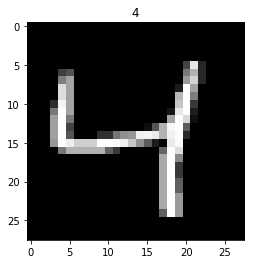

Epoch:  0 | train loss: 1.2270


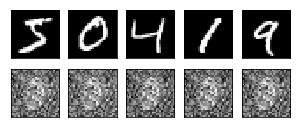

Epoch:  0 | train loss: 0.8169


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.7832


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.7911


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.8016


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.8285


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.8213


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.8189


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.8206


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.8614


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.8276


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.8324


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.7992


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.8130


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.7846


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.8163


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.8072


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.7792


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.7685


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.7868


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.8046


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.7918


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.8397


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.7770


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.7756


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.7355


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.7557


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.7324


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.7330


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.7328


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.7152


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.7339


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.7122


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.7206


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.7384


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.7316


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.7411


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.7121


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.6869


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.7438


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.7097


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.7268


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.7220


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.6887


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.7536


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.7070


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.6685


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.7034


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.6659


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.7055


<Figure size 432x288 with 0 Axes>

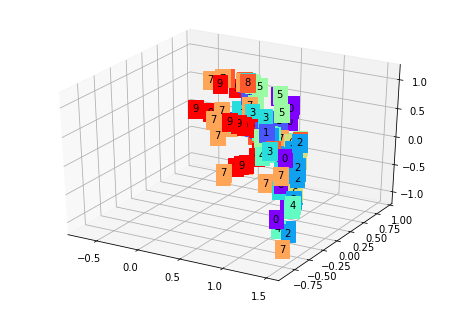

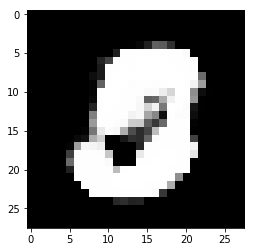

In [2]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
 
 
# torch.manual_seed(1)    # reproducible
 
# Hyper Parameters
EPOCH = 5
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5
 
# Mnist digits dataset
train_data = torchvision.datasets.MNIST("./mnist_data", train=True, download=True,
           transform=transforms.Compose([
               transforms.ToTensor(),
               transforms.Normalize((0.1307,), (0.3081,))
           ]))

# plot one example
print(train_data.data.size())     # (60000, 28, 28)
print(train_data.targets.size())   # (60000)
plt.imshow(train_data.data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[2])
plt.show()
 
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
 
 
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
 
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
 
 
autoencoder = AutoEncoder()
 
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()
 
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))    # f是一块画布；a是一个大小为2*5的数组，数组中的每个元素都是一个画图对象
plt.ion()   # Turn the interactive mode on, continuously plot
 
# original data (first row) for viewing
view_data = train_data.data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray')
    a[0][i].set_xticks(()); a[0][i].set_yticks(())
 
for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)
 
        encoded, decoded = autoencoder(b_x)
 
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients
 
        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())
 
            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(())
                a[1][i].set_yticks(())
            plt.draw()
            plt.pause(0.02)
 
plt.ioff()   # Turn the interactive mode off
plt.show()
 
# visualize in 3D plot
view_data = train_data.data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2)
ax = Axes3D(fig)    # 3D 图
# x, y, z 的数据值
X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy()
values = train_data.targets[:200].numpy()    # 标签值
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9))    # 上色
    ax.text(x, y, z, s, backgroundcolor=c)    # 标位子
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()
 
 
# test the decoder with a random code
code = torch.FloatTensor([[1.7, -2.5, 3.1]])   # 随机给一个张量
decode = autoencoder.decoder(code)  # decode shape (1, 178)
decode = decode.view(decode.size()[0], 28, 28)
decode_img = decode.squeeze().data.numpy() * 255
plt.figure()
plt.imshow(decode_img.astype(np.uint8), cmap='gray')